<a href="https://colab.research.google.com/github/Data4Bioinfo/bioinfo_py_inicial/blob/main/C%C3%B3pia_de_Nivelamento_Computa%C3%A7%C3%A3o_CV2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução à Computação** 💻
### Curso de Verão em Bioinformática - USP (2025)  🧬  *Ma. Rayana S. Feltrin*

### **Exemplo prático 1** 🧬
####**Obtendo informações do hardware**

**Dica:** Colocar um ! no início da célula permite executar comandos do Linux no Colab

In [ ]:
# Descobrindo informações sobre a CPU
!lscpu

*   **grep:** identifica e retorna uma ou mais linhas que seguem um padrão especificado

In [ ]:
# Descobrindo informações sobre a memória RAM
!grep "MemTotal" /proc/meminfo

In [ ]:
# Obtendo informações sobre o uso do disco (disk free)
!df -h #human-readable

### 🔷 **OBS.:** Google Drive
Fazer upload dos arquivos no Colab (ícone de pasta à esquerda)!

### **Exemplo prático 2** 🧬
Qual o número de sequências (contigs) no genoma de referência da bactéria *Bacillus siamensis*? (https://www.ncbi.nlm.nih.gov/datasets/genome/GCF_000262045.1/)


*   **head:** imprime na tela as primeiras linhas do arquivo




In [ ]:
# Visualizando o início do arquivo FASTA
!head Bacillus-siamensis-genomic.fna

In [ ]:
# Identificando todos os headers do genoma (que contêm o caractere ">")
!grep ">" Bacillus-siamensis-genomic.fna


*   **wc** *(word count)*: reporta o número de linhas, palavras e bytes para cada arquivo




In [ ]:
# Usando o wc
!wc /content/sample_data/README.md

In [ ]:
# Listando os conteúdos do diretório
!ls sample_data/

In [ ]:
# Usando o wc para contar apenas linhas
!wc -l /content/sample_data/README.md

####**Concatenando comandos com o pipe |**

O pipe direciona a saída (output) de um comando para a entrada (input) de outro

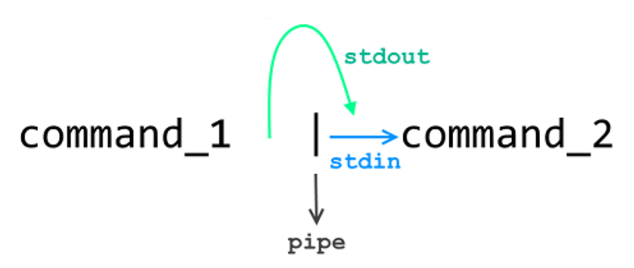

In [ ]:
# Obtendo o número de contigs do genoma de B. siamensis
!grep ">" Bacillus-siamensis-genomic.fna | wc -l

### **Exemplo prático 3** 🧬
####**Concatenando sequências**

As sequências FASTA são provenientes do *output* de dois algoritmos diferentes de *binning* em metagenômica.

Para rodar outro software, preciso concatenar o conteúdo delas!!!


*   **cat:** concatena arquivos e mostra o output na tela



In [ ]:
# Concatenando os arquivos
!cat concoct.fa metabat2.fa

In [ ]:
# Direcionando o output para um novo arquivo com ">"
!cat concoct.fa metabat2.fa > concatenated_binning.fa

### **Exemplo prático 4** (relacionado ao anterior) 🧬
#### **Quantos contigs foram obtidos por ambos os algoritmos?**
Apenas os headers dos contigs foram redirecionados para arquivos .txt, que serão aqui utilizados

In [ ]:
# Primeiramente, vamos ver quantos contigs (-c, count) cada algoritmo recuperou
!grep -c ">" headers-concoct.txt
!grep -c ">" headers-metabat.txt

Para comparar o conteúdo dos dos arquivos .txt, iremos utilizar o comando **comm**, mas como ele necessita que o arquivo esteja ordenado, antes dele utilizaremos o comando **sort** e direcionaremos o output para dois novos arquivos

In [ ]:
# Ordenando o conteúdo dos arquivos
!sort headers-concoct.txt > headers-concoct-sorted.txt
!sort headers-metabat2.txt > headers-metabat2-sorted.txt



*   **comm**

    **Coluna 1:** exibe as linhas únicas ao primeiro arquivo

    **Coluna 2:** exibe as linhas únicas ao segundo arquivo

    **Coluna 3:** exibe as linhas compartilhadas por ambos os arquivos



In [ ]:
# Comparando os arquivos e obtendo o número de contigs em comum
!comm -12 headers-concoct-sorted.txt headers-metabat2-sorted.txt | wc -l
# -12 exclui do output as duas primeiras colunas

#####**Preparando input para um software que extrai sequências, o seqtk**

https://github.com/lh3/seqtk

Suponhamos que agora precisemos extrair apenas as sequências compartilhadas entre os dois algoritmos para um arquivo FASTA. Para isso, precisamos de um arquivo com os IDs das sequências: nesse caso, os headers, mas sem o ">".

Sintaxe do seqtk para extração de sequências:
`seqtk subseq in.fq name.lst > out.fq`

Então, como faremos para "limpar" esses headers?

In [ ]:
# Primeiramente, vamos redirecionar o output apenas do comando comm para um novo arquivo
!comm -12 headers-concoct-sorted.txt headers-metabat2-sorted.txt > shared-headers.txt



*   **sed** (stream editor): editor para filtrar e transformar texto 😞

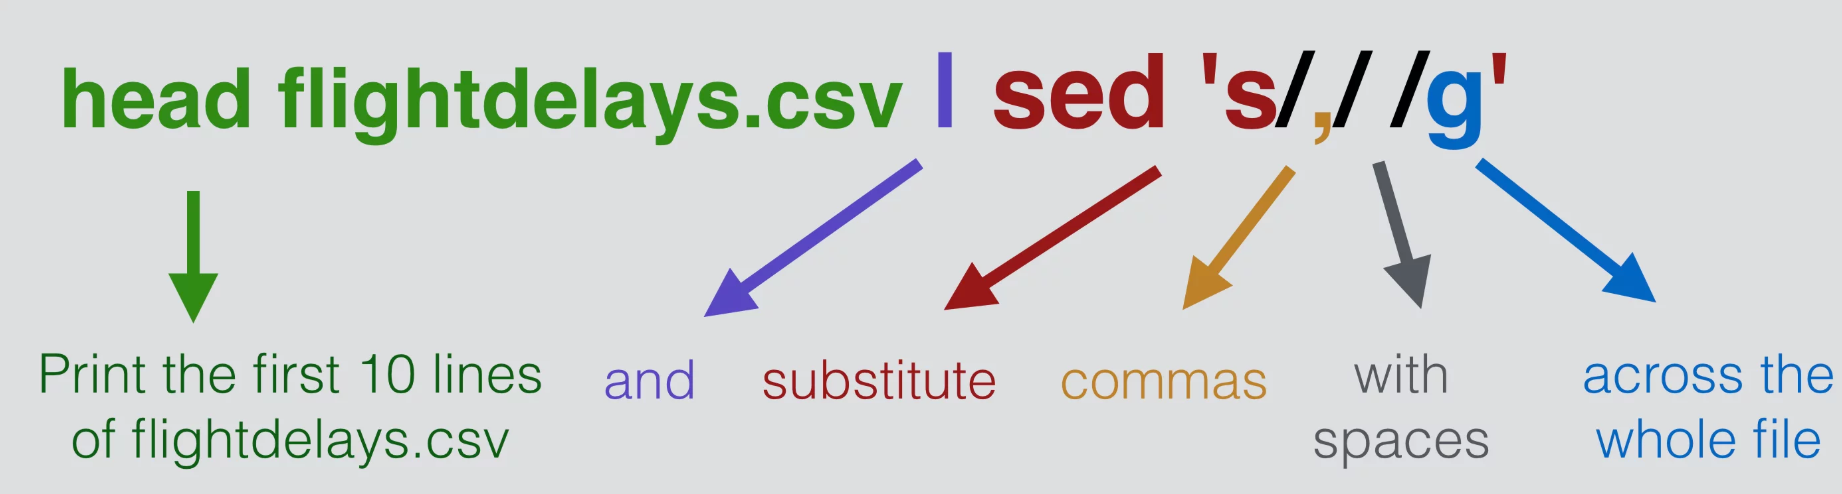




In [ ]:
# Agora, vamos susbstituir o ">" inicial (^) por nada
!sed 's/^>//' shared-headers.txt

sed: can't read shared-headers.txt: No such file or directory


In [ ]:
# Basta redirecionar o output anterior para outro arquivo, que será usado no input do seqtk
!sed 's/^>//' shared-headers.txt > shared-headers-cleaned.txt

sed: can't read shared-headers.txt: No such file or directory


### **Exemplo prático 5** 🧬
#### **Baixando e descompactando um genoma de bacteriófago**
O PhiX é um vírus que infecta *Escherichia coli* e é usado pela Illumina como controle interno do sequenciamento 🦠


*   **wget:** faz download de arquivos diretamente da web



In [ ]:
# Obtendo o arquivo do genoma do PhiX
!wget http://igenomes.illumina.com.s3-website-us-east-1.amazonaws.com/PhiX/Illumina/RTA/PhiX_Illumina_RTA.tar.gz

A extensão **.tar.gz** indica uma forma de compactação de arquivos bastante comum em Linux, e envolve dois algoritmos de compressão, o **tar** e o **gzip**. Porém, precisamos fazer a descompactação para conseguir acessá-lo!


*   **tar:** compacta e descompacta arquivos

    **-x:** extrai o conteúdo do arquivo

    **-v:** *verbose*, mostra na tela os arquivos que são extraídos

    **-z:** descomprime utilizando GZIP

    **-f:** especifica o arquivo a ser extraído


In [ ]:
# Descompactando o arquivo
!tar -xvzf PhiX_Illumina_RTA.tar.gz

### **Exemplo prático 6** 🧬
#### **Explorando os genes do SARS-CoV-2 (linhagem de Wuhan)**
Arquivo de anotação GFF (*General Feature Format*)


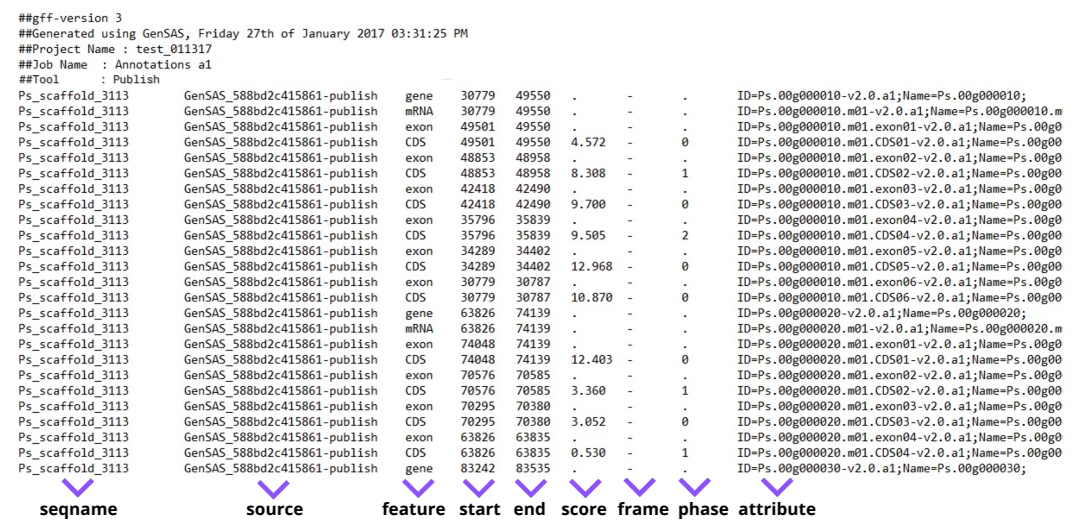

In [ ]:
# Primeiramente, vamos dar uma olhada no arquivo
!head -n 15 SARS-CoV-2-Wuhan.gff #n especifica o número de linhas iniciais a serem exibidas

##### **Quantos genes o SARS-CoV-2 tem?**
**grep -v:** imprime na tela as linhas que não seguem o padrão especificado

In [ ]:
# Removendo o cabeçalho e printando na tela apenas as colunas
!grep -v "#" SARS-CoV-2-Wuhan.gff

##### **Qual o tamanho do gene que codifica para a proteína spike?**

In [ ]:
# Primeiro, vamos printar apenas as linhas que contêm a palavra "spike"
!grep "spike" SARS-CoV-2-Wuhan.gff



*   **awk:** ferramenta de processamento de texto que também é uma linguagem de programação



In [ ]:
# Agora, vamos usar o comando anterior e o awk para calcular o tamanho do gene da spike
!grep "spike" SARS-CoV-2-Wuhan.gff | awk '{print $5 - $4 + 1}'

In [ ]:
# Já encontramos o tamanho do gene, mas para remover o resultado duplicado, vamos usar o "uniq"
# aliado aos comandos anteriores
!grep "spike" SARS-CoV-2-Wuhan.gff | awk '{print $5 - $4 + 1}' | uniq # +1 porque é inclusivo

*   **cut:** extrai seções de todas as linhas de um arquivo

    **-f:** *fields*, especifica uma coluna a ser extraída

In [ ]:
# Executando o comando anterior e imprimindo na tela apenas a terceira coluna
!grep -v "#" SARS-CoV-2-Wuhan.gff | cut -f 3

In [ ]:
# Executando os comandos anteriores, capturando e contando (-c) apenas as ocorrências de genes para obter seu número
!grep -v "#" SARS-CoV-2-Wuhan.gff | cut -f 3 | grep -c "gene"